# **Business case (Problem Statement)**
Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles, drugs and many various other things. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors which will help to predict the disease.

## **Importing Basic Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

## **Importing Dataset**

In [ ]:
data=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv" , header = None)

* As the dataset does not have header column hence we need to use **header = None** so that we can define header to the file using the code. Otherwise we have to alter the original excel / csv file.


## **Defining Column Names to the Dataset**

In [ ]:
column_names = ['Age' , 'Gender' , 'Total Bilirubin' , 'Direct Bilirubin' , 'Alkaline Phosphotase' , 'Alamine Aminotransferase' ,
                'Aspartate Aminotransferase' , 'Total Protiens' , 'Albumin' , 'Albumin and Globulin Ratio' , 'Target']

data.columns = column_names

* This line of code will define the header to the dataset and assign column name to each column of the data.
This will help us to understand the data and make the necessary calculations over the same.

## **Basic Checks**

In [ ]:
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


* This line of code will help to display first five rows of the dataset

In [ ]:
data.tail()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


* This line of code will help to display last five rows of the dataset

In [ ]:
data.shape

(583, 11)

* This line of code will help to display total rows and columns of the dataset

In [ ]:
data.dtypes


Age                             int64
Gender                         object
Total Bilirubin               float64
Direct Bilirubin              float64
Alkaline Phosphotase            int64
Alamine Aminotransferase        int64
Aspartate Aminotransferase      int64
Total Protiens                float64
Albumin                       float64
Albumin and Globulin Ratio    float64
Target                          int64
dtype: object

* This line of code will help to display the datatype of each column available in this dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total Bilirubin             583 non-null    float64
 3   Direct Bilirubin            583 non-null    float64
 4   Alkaline Phosphotase        583 non-null    int64  
 5   Alamine Aminotransferase    583 non-null    int64  
 6   Aspartate Aminotransferase  583 non-null    int64  
 7   Total Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin and Globulin Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


* This line of code will help to display the datatype along with the non null value available in the dataset. From that we came to know that there are some null values available in the dataset in column Albumin and Globulin Ratio.

In [ ]:
data.isnull().sum()

Age                           0
Gender                        0
Total Bilirubin               0
Direct Bilirubin              0
Alkaline Phosphotase          0
Alamine Aminotransferase      0
Aspartate Aminotransferase    0
Total Protiens                0
Albumin                       0
Albumin and Globulin Ratio    4
Target                        0
dtype: int64

* This line of code displays the null values available in Albumin and Globulin Ratio column

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin and Globulin Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Target,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


* This line of code will display the details of the numerical data available in the dataset such as Count, Mean Value, Standard Deviation, Minimum Value, Maximum Value, All three Quantiles and Maximum Value

In [ ]:
data.describe(include='O')

,Gender
count,583
unique,2
top,Male
freq,441


 * This line of code will display the details of the categorical column available in the dataset such as Total Count, Unique Values available in column

In [ ]:
data.isnull().sum()

Age                           0
Gender                        0
Total Bilirubin               0
Direct Bilirubin              0
Alkaline Phosphotase          0
Alamine Aminotransferase      0
Aspartate Aminotransferase    0
Total Protiens                0
Albumin                       0
Albumin and Globulin Ratio    4
Target                        0
dtype: int64

* This line of code will display the null values available in Albumin and Globulin Ratio, We found that there are 4 null values available in Albumin and Globulin Ratio.

In [ ]:
data['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

* This line of code will display the different values and counts of the same available in the Gender column

In [ ]:
data.duplicated().sum()

13

* This line of code will display the total duplicate rows in the dataset

In [ ]:
data.drop_duplicates(inplace = True)

* This line of code remove the duplicate rows available in the dataset

In [ ]:
data

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


## **Domain Analysis**

Basically we can see that this data set is blood test report of persons who has done blood test to check the functionality of Liver. This Blood Test containas Various features such as Age, Gender, Total Bilirubin, Direct Bilirubin, Alkaline Phosphotase, Alamine Aminotransferase, Aspartate Aminotransferase, Total Protiens, Albumin, Albumin and Globulin Ratio.

Which can confirm wheather person have any defect in the Liver or not.

**Detailed Description:**

* **Age:** This column indicated the age of the person who has done the blood test
* **Gender:** This column indicated the Gender of a person who has done the test, We found that only Male and Female are available in the data set.
* **Total_Bilirubin:** Normal range for total bilirubin levels are between 0.3 mg/dL to 1 mg/dL. In adults it can be till 1.2 mg/dL however it is consider to be danger if level exceed 1.2 mg/dL
* **Direct_Bilirubin:** It is a form of bilirubin which has been conjugated with glucoronic acid and is excreted in the bile,normal values of direct bilirubin are from 0 to 0.4 mg/dL. It is consider as danger if it exceeds 0.4 mg/dL
* **alkaline_phosphotase:** Usually it is denoted by ALP The normal range can be considered from 44 to 147 IU/L or 0.73 to 2.45 µkat/L. If it exceeds the normal range it may danage the lifer functionality of a person.
* **Alamine_Aminotransferase:** Usually it is denoted by ALT. It is an enzyme that helps the liver to  convert the food into energy. A normal ALT range is from 7 to 55 U/L. If it exceeds the normal levels it may damage the liver functionality.
* **Aspartate_Aminotransferase:** Usially it is denoted by AST. The normal range for AST varies from laboratory to laboratory. One common reference range for an AST blood test is 8 to 33 U/L. If it exceeds the normal levels it may damage the liver functionality.
* **Total_Protiens:** If your total protein level is low, you may have a liver or kidney problem, or it may be that protein isn't being digested or absorbed properly. The normal protein range is from 6.0 to 8.3 g/dL.
* **Albumin:** A normal albumin range is between 3.4 to 5.4 g/dL. If you have a lower albumin level, you may have malnutrition. It can also mean that person have liver disease or person's liver is not working properly which can cause increase in Albumin levels.
* **Albumin_and_Globulin_Ratio:** Usually the albumin/globulin ratio is between 1.1 and 2.5. Doctor can understang the defect by seeing the this range. Doctor can predict whether it is liver related issue or Kidney related issue or intestine related issue.

## **Exploratory Data Analysis**

* **Univariate Analysis**

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html('univariate.html')       # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |      | [  0%]   00:00 -> (? left)

Report univariate.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Insights are as Mentioned below for Univariate Analysis

* **Age:** No missing data found in the Age Column, Maximum value available in the Age column is 90 yrs while minimum value mentioned is 4 yrs. Upper Quantile value is 58.0 while Lower Quantile valie is 33.0. **IQR Value for Age column is 25.0**. Standard deviation value for Age column is 16.2. this confirms that data is not normally distributed.

* **Total Bilirubin:** No missing data found in the Total Bilirubin Column, Maximum value available in the Total Bilirubin column is 75 while minimum value mentioned is 0.4. Upper Quantile value is 2.6 while Lower Quantile valie is 0.8. **IQR Value for Total Bilirubin column is 1.80**. Standard deviation value for Total Bilirubin column is 6.21. this confirms that data is not normally distributed.

* **Direct Bilirubin:** No missing data found in the Direct Bilirubin Column, Maximum value available in the Direct Bilirubin column is 19.7 while minimum value mentioned is 0.1. Upper Quantile value is 1.3 while Lower Quantile valie is 0.2. **IQR Value for Direct Bilirubin column is 1.10**. Standard deviation value for Direct Bilirubin column is 2.81. this confirms that data is not normally distributed.

* **Alkaline Phosphate:** No missing data found in the Alkaline Phosphate Column, Maximum value available in the Alkaline Phosphate column is 2110 while minimum value mentioned is 63. Upper Quantile value is 298 while Lower Quantile valie is 176. **IQR Value for Alkaline Phosphate column is 122**. Standard deviation value for Alkaline Phosphate column is 243. this confirms that data is not normally distributed.

* **Alamine Aminotransferase:** No missing data found in the Alamine Aminotransferase Column, Maximum value available in the Alamine Aminotransferase column is 2,000 while minimum value mentioned is 10. Upper Quantile value is 60 while Lower Quantile valie is 23. **IQR Value for Alamine Aminotransferase column is 37.5**. Standard deviation value for Alamine Aminotransferase column is 183. this confirms that data is not normally distributed.

* **Aspartate Aminotransferase:** No missing data found in the Aspartate Aminotransferase Column, Maximum value available in the Aspartate Aminotransferase column is 4,929 while minimum value mentioned is 10. Upper Quantile value is 87 while Lower Quantile value is 25. **IQR Value for Aspartate Aminotransferase column is 62.0**. Standard deviation value for Aspartate Aminotransferase column is 289. this confirms that data is not normally distributed.

* **Total Protein:** No missing data found in the Total Protein Column, Maximum value available in the Total Protein column is 9.60 while minimum value mentioned is 2.70. Upper Quantile value is 7.2 while Lower Quantile value is 5.8. **IQR Value for Total Protein column is 1.40**. Standard deviation value for Total Protein column is 1.09. this confirms that data is not normally distributed.

* **Albumin:** No missing data found in the Albumin Column, Maximum value available in the Albumin column is 5.50 while minimum value mentioned is 0.90. Upper Quantile value is 3.80 while Lower Quantile value is 2.60. **IQR Value for Albumin column is 1.20**. Standard deviation value for Albumin is 1.09. this confirms that data is not normally distributed.

* **Albumin and Globulin Ratio:** We found 4 missing values in this column of the Albumin and Globulin Ratio Column, Maximum value available in the Albumin and Globulin Ratio column is 2.80 while minimum value mentioned is 0.30. Upper Quantile value is 1.10 while Lower Quantile value is 0.70. **IQR Value for Albumin column is 0.40**. Standard deviation value for Albumin is 0.320. this confirms that data is normally distributed.

* **Gender:** Gender columns reflects the gender of the patient approximately 80 % data is for male patients and approximately 20 % is of female patients. No any other values found in this column. No null values found in this column.

* **Target:** This is the output column of the dataset. This displays whether patient has a infected liver or not.

* **BiVARIATE ANALYSIS**


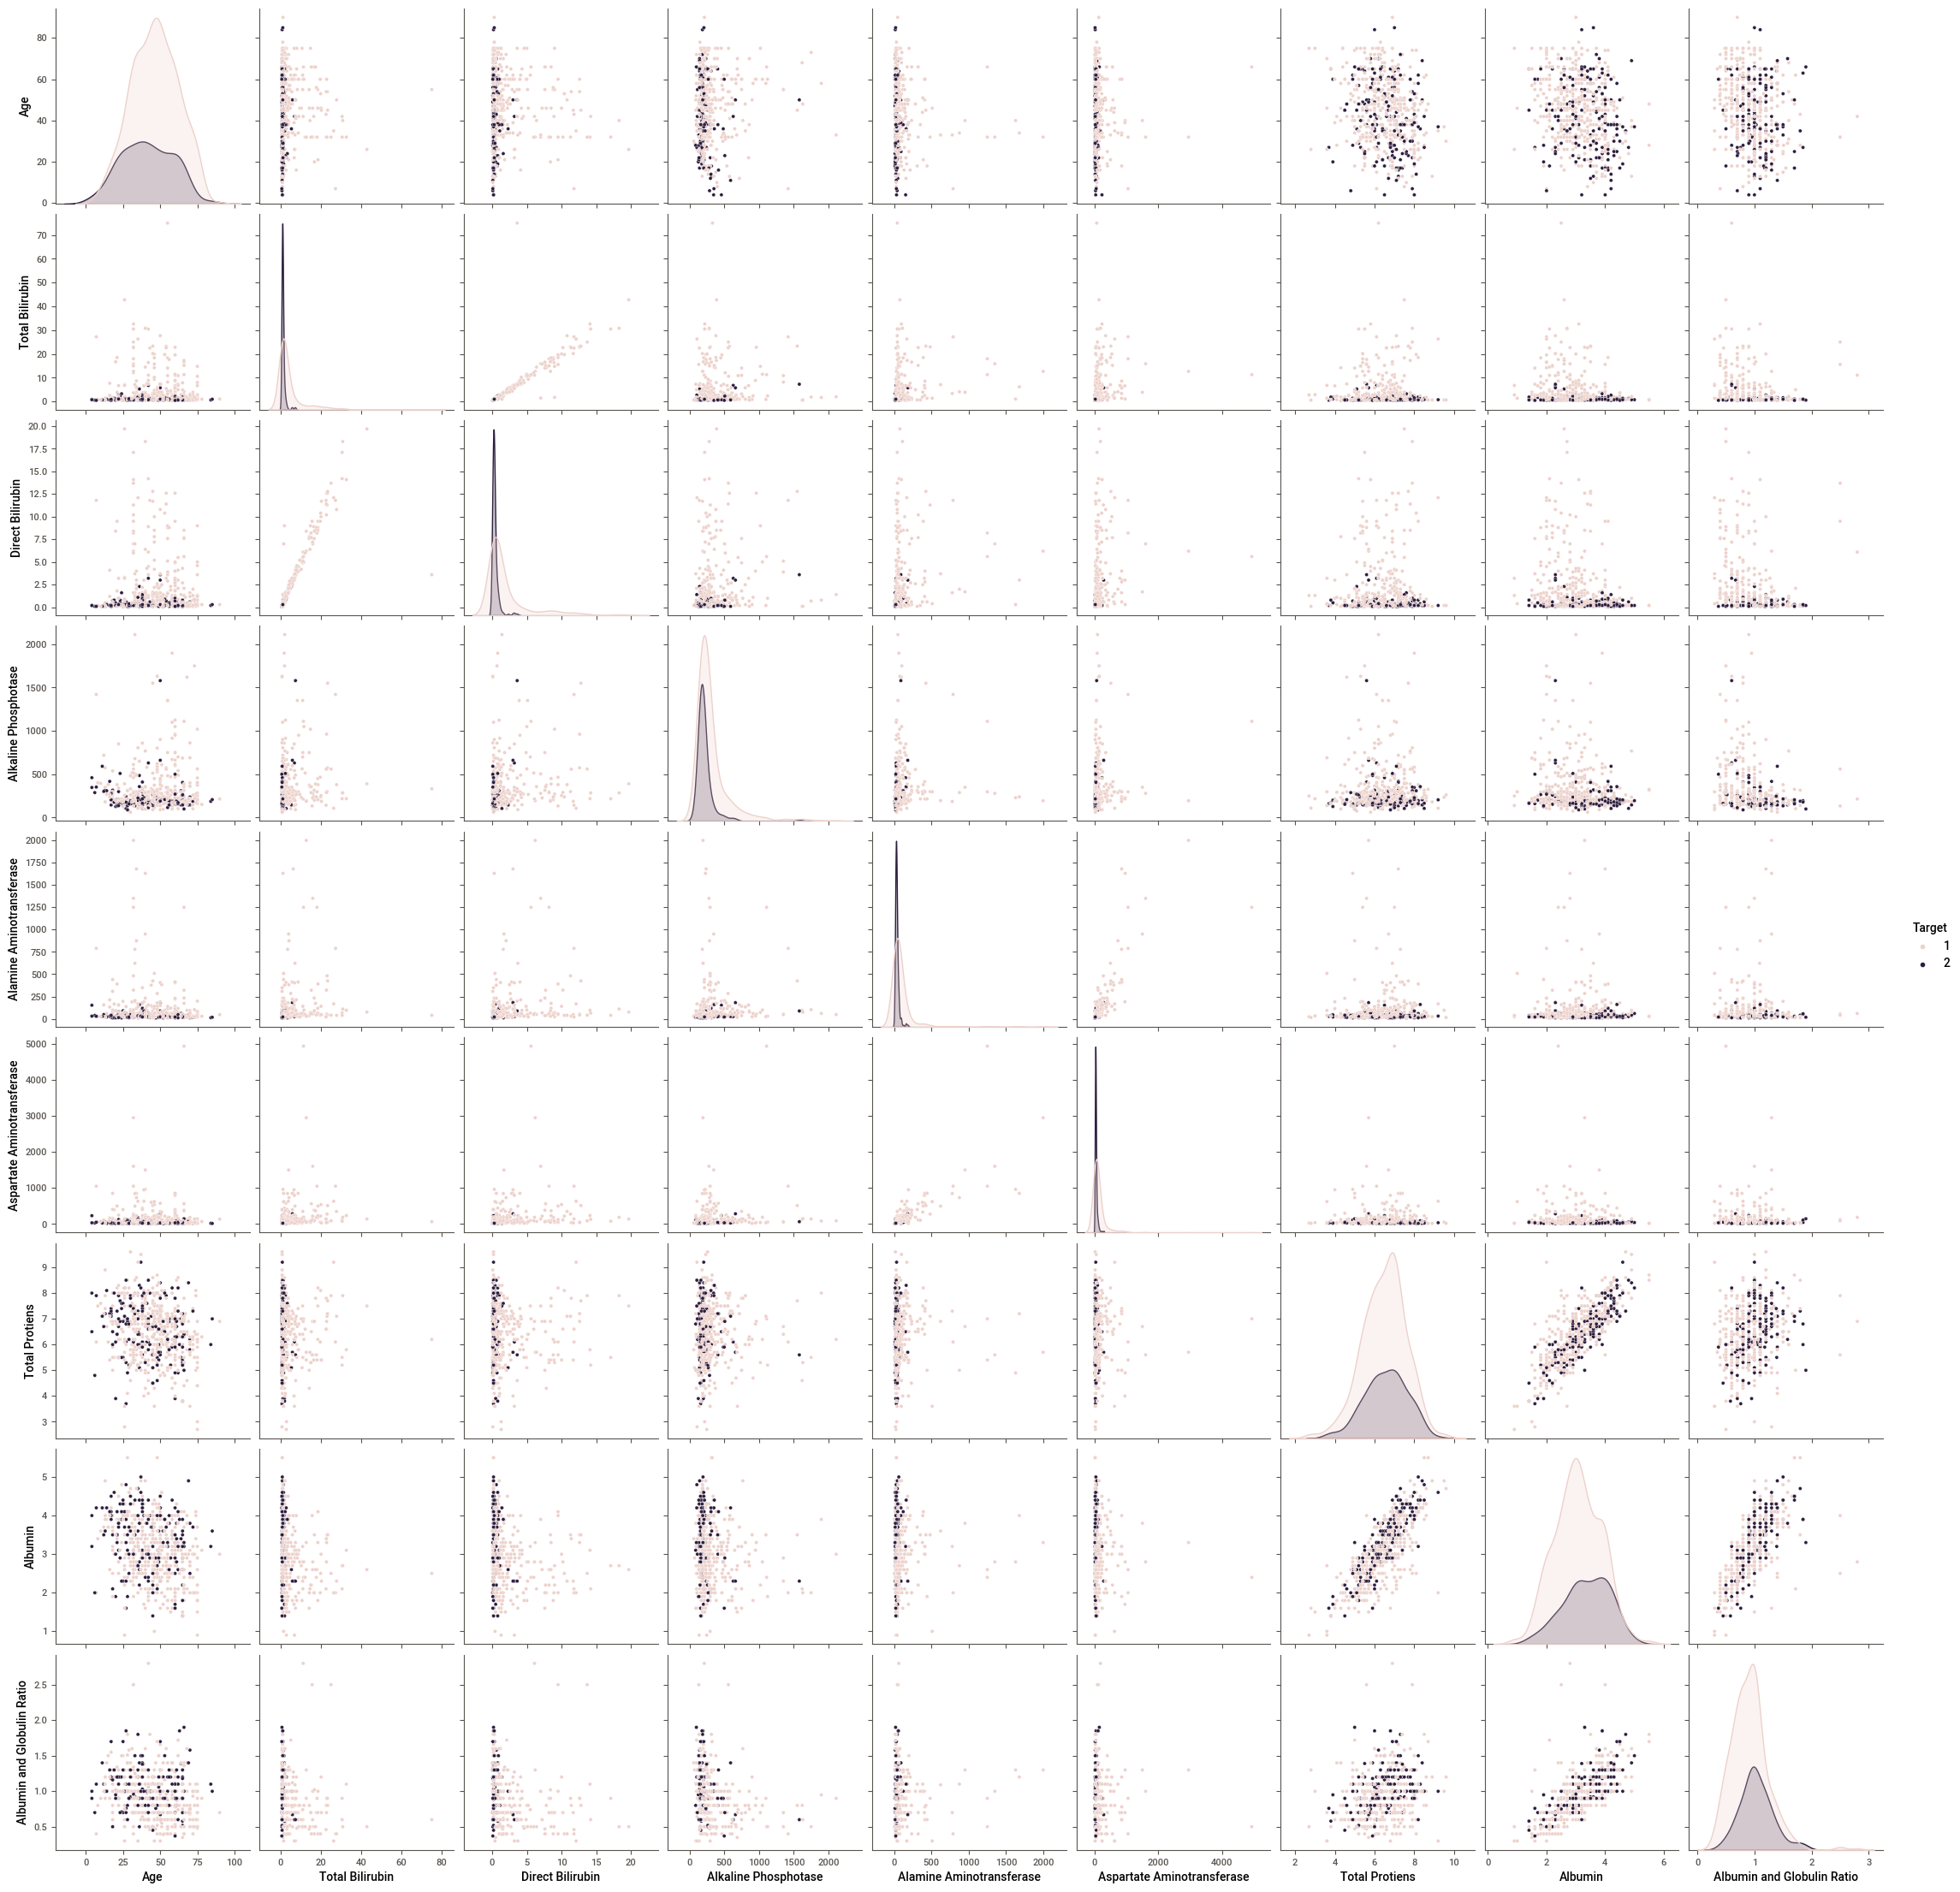

In [ ]:
sb.pairplot(data = data, hue = 'Target')

In [ ]:
num_data = data.select_dtypes(include = ["float64","int64"])
print("numerical colums: ",num_data.columns)

numerical colums:  Index(['Age', 'Total Bilirubin', 'Direct Bilirubin', 'Alkaline Phosphotase',
       'Alamine Aminotransferase', 'Aspartate Aminotransferase',
       'Total Protiens', 'Albumin', 'Albumin and Globulin Ratio', 'Target'],
      dtype='object')


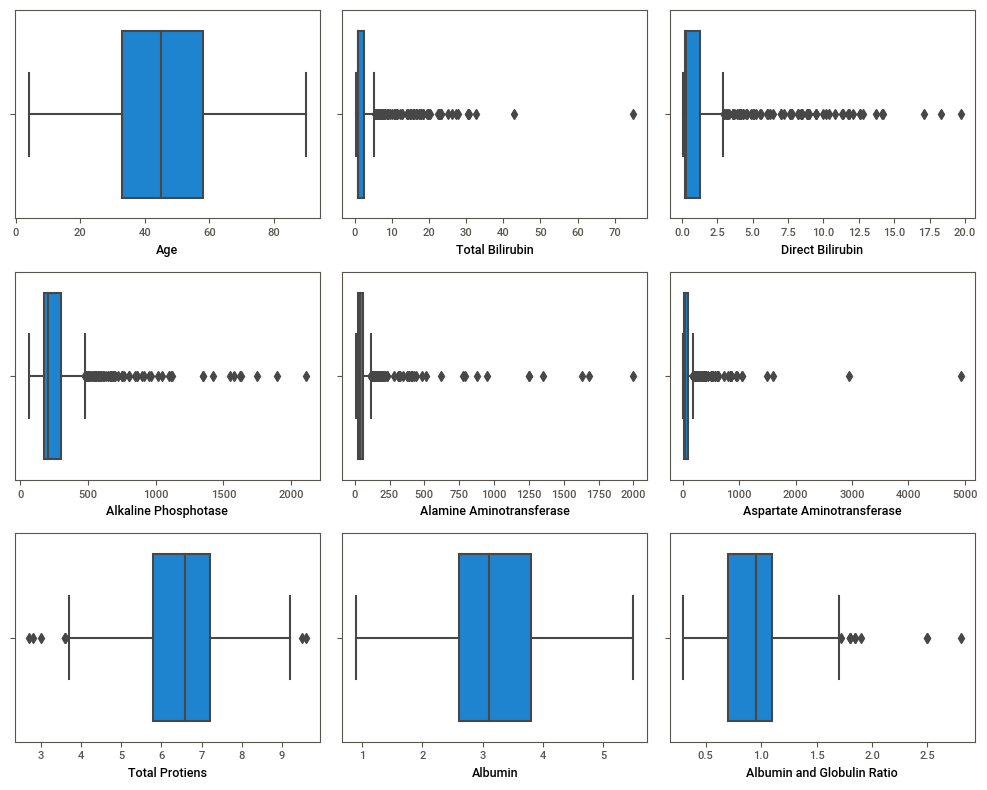

In [ ]:
# Plotting to find the outliers in the each numerical columns

plt.figure(figsize = (10,8), facecolor = 'white')          #canvas size
plotnumber = 1                                         #count variable

for column in num_data:                                #for loop to acess columns form data1
    if plotnumber <= 9:                                  #checking whether count variable is less than 3 or not
        ax = plt.subplot(3, 3, plotnumber)               #plotting 3 graphs in canvas(2 rows and 2 columns)
        sb.boxplot(x = num_data[column])                 #plotting box plot
        plt.xlabel(column, fontsize = 9)                 #assigning name to x-axis and increasing it's font
    plotnumber += 1                                      #increasing counter
plt.tight_layout()


## **Data Preprocessing**

In [ ]:
num_data.skew()

Age                           -0.046597
Total Bilirubin                4.869459
Direct Bilirubin               3.187685
Alkaline Phosphotase           3.728405
Alamine Aminotransferase       6.695054
Aspartate Aminotransferase    10.559418
Total Protiens                -0.310929
Albumin                       -0.060829
Albumin and Globulin Ratio     1.001294
Target                         0.940320
dtype: float64

In [ ]:
num_data.kurt()

Age                            -0.565802
Total Bilirubin                36.506452
Direct Bilirubin               11.122476
Alkaline Phosphotase           17.355150
Alamine Aminotransferase       52.711534
Aspartate Aminotransferase    150.307467
Total Protiens                  0.265701
Albumin                        -0.373112
Albumin and Globulin Ratio      3.354530
Target                         -1.119740
dtype: float64

In [ ]:
data.isnull().sum()

Age                           0
Gender                        0
Total Bilirubin               0
Direct Bilirubin              0
Alkaline Phosphotase          0
Alamine Aminotransferase      0
Aspartate Aminotransferase    0
Total Protiens                0
Albumin                       0
Albumin and Globulin Ratio    4
Target                        0
dtype: int64

* This line of code shows us that there are 4 missing values present in the Albumin and Globulin Ratio column. As this column is normally distributed hence we can replace the same null values with the mean value

In [ ]:
print("As data seems to be balanced we will use the mean value to replace the Null Values:" , data['Albumin and Globulin Ratio'].mean())
data.loc[data['Albumin and Globulin Ratio'].isnull()==True,'Albumin and Globulin Ratio']=data['Albumin and Globulin Ratio'].mean()

As data seems to be balanced we will use the mean value to replace the Null Values: 0.9480035335689044


* **Handling Outliers**

* Above in the box plot we can see that there are outliers available in all the columns except Age and Albumin. Hence we need to see the % of the outliers available in the datatset. If that is less than 5 % then we will replace those value but if we found that the number of outliers available in column is more than 5 % then we will not handle those as that might affect the outputs.

In [ ]:
Q1_TB = data['Total Bilirubin'].quantile(0.25)
print("lower quartile: ",Q1_TB)
Q3_TB = data['Total Bilirubin'].quantile(0.75)
print("upper quartile: ",Q3_TB,"\n")

IQR_TB = Q3_TB - Q1_TB
print("IQR for Total Bilirubin: ",IQR_TB,"\n")

ll_TB = Q1_TB - (1.5 * IQR_TB)
print('lower limit is',ll_TB)
ul_TB = Q3_TB + (1.5 * IQR_TB)
print('upper limit is',ul_TB,'\n')

print("Data above Upper Limite which is consider as outlier: ", len(data.loc[data['Total Bilirubin'] > ul_TB]) / len(data) * 100,"%")
print("Data below Lower Limite which is consider as outlier: ",len(data.loc[data['Total Bilirubin'] < ll_TB]) / len(data) * 100,"%")

lower quartile:  0.8
upper quartile:  2.6 

IQR for Total Bilirubin:  1.8 

lower limit is -1.9000000000000001
upper limit is 5.300000000000001 

Data above Upper Limite which is consider as outlier:  14.561403508771932 %
Data below Lower Limite which is consider as outlier:  0.0 %


* **We can clearly see that Outliers available in the Total Bilirubin column is more than 14% hence we will not handle these outliers as this will impact stongly on de prediction.**

In [ ]:
Q1_DB = data['Direct Bilirubin'].quantile(0.25)
print("lower quartile: ",Q1_DB)
Q3_DB = data['Direct Bilirubin'].quantile(0.75)
print("upper quartile: ",Q3_DB,"\n")

IQR_DB = Q3_DB - Q1_DB
print("IQR for Direct Bilirubin: ",IQR_DB,"\n")

ll_DB = Q1_DB - (1.5 * IQR_DB)
print('lower limit is',ll_DB)
ul_DB = Q3_DB + (1.5 * IQR_DB)
print('upper limit is',ul_DB,'\n')

print("Data above Upper Limite which is consider as outlier: ", len(data.loc[data['Direct Bilirubin'] > ul_DB]) / len(data) * 100,"%")
print("Data below Lower Limite which is consider as outlier: ", len(data.loc[data['Direct Bilirubin'] < ll_DB]) / len(data) * 100,"%")

lower quartile:  0.2
upper quartile:  1.3 

IQR for Direct Bilirubin:  1.1 

lower limit is -1.4500000000000002
upper limit is 2.95 

Data above Upper Limite which is consider as outlier:  14.035087719298245 %
Data below Lower Limite which is consider as outlier:  0.0 %



* **We can clearly see that Outliers available in the Direct Bilirubin column is more than 13% hence we will not handle these outliers as this will impact stongly on de prediction.**

In [ ]:
Q1_ALP = data['Alkaline Phosphotase'].quantile(0.25)
print("lower quartile: ",Q1_ALP)
Q3_ALP = data['Alkaline Phosphotase'].quantile(0.75)
print("upper quartile: ",Q3_ALP,"\n")

IQR_ALP = Q3_ALP - Q1_ALP
print("IQR for Alkaline Phosphotase: ",IQR_ALP,"\n")

ll_ALP = Q1_ALP - (1.5 * IQR_ALP)
print('lower limit is',ll_ALP)
ul_ALP = Q3_ALP + (1.5 * IQR_ALP)
print('upper limit is',ul_ALP,'\n')

print("Data above Upper Limite which is consider as outlier: ", len(data.loc[data['Alkaline Phosphotase'] > ul_ALP]) / len(data) * 100,"%")
print("Data below Lower Limite which is consider as outlier: ", len(data.loc[data['Alkaline Phosphotase'] < ll_ALP]) / len(data) * 100,"%")

lower quartile:  176.0
upper quartile:  298.0 

IQR for Alkaline Phosphotase:  122.0 

lower limit is -7.0
upper limit is 481.0 

Data above Upper Limite which is consider as outlier:  12.105263157894736 %
Data below Lower Limite which is consider as outlier:  0.0 %


* **We can clearly see that Outliers available in the Alkaline Phosphotase column is more than 13% hence we will not handle these outliers as this will impact stongly on de prediction.**

In [ ]:
Q1_ALT = data['Alamine Aminotransferase'].quantile(0.25)
print("lower quartile: ",Q1_ALT)
Q3_ALT = data['Alamine Aminotransferase'].quantile(0.75)
print("upper quartile: ",Q3_ALT,"\n")

IQR_ALT = Q3_ALT - Q1_ALT
print("IQR for Alamine Aminotransferase: ",IQR_ALT,"\n")

ll_ALT = Q1_ALT - (1.5 * IQR_ALT)
print('lower limit is',ll_ALT)
ul_ALT = Q3_ALT + (1.5 * IQR_ALT)
print('upper limit is',ul_ALT,'\n')

print("Data above Upper Limite which is consider as outlier: ", len(data.loc[data['Alamine Aminotransferase'] > ul_ALT]) / len(data) * 100,"%")
print("Data below Lower Limite which is consider as outlier: ", len(data.loc[data['Alamine Aminotransferase'] < ll_ALT]) / len(data) * 100,"%")

lower quartile:  23.0
upper quartile:  60.0 

IQR for Alamine Aminotransferase:  37.0 

lower limit is -32.5
upper limit is 115.5 

Data above Upper Limite which is consider as outlier:  12.631578947368421 %
Data below Lower Limite which is consider as outlier:  0.0 %


* **We can clearly see that Outliers available in the Alamine Aminotransferase column is more than 12% hence we will not handle these outliers as this will impact stongly on de prediction.**

In [ ]:
Q1_AST = data['Aspartate Aminotransferase'].quantile(0.25)
print("lower quartile: ",Q1_AST)
Q3_AST = data['Aspartate Aminotransferase'].quantile(0.75)
print("upper quartile: ",Q3_AST,"\n")

IQR_AST = Q3_AST - Q1_AST
print("IQR for Aspartate Aminotransferase: ",IQR_AST,"\n")

ll_AST = Q1_AST - (1.5 * IQR_AST)
print('lower limit is',ll_AST)
ul_AST = Q3_AST + (1.5 * IQR_AST)
print('upper limit is',ul_AST,'\n')

print("Data above Upper Limite which is consider as outlier: ", len(data.loc[data['Aspartate Aminotransferase'] > ul_AST]) / len(data) * 100,"%")
print("Data below Lower Limite which is consider as outlier: ", len(data.loc[data['Aspartate Aminotransferase'] < ll_AST]) / len(data) * 100,"%")

lower quartile:  25.0
upper quartile:  86.75 

IQR for Aspartate Aminotransferase:  61.75 

lower limit is -67.625
upper limit is 179.375 

Data above Upper Limite which is consider as outlier:  11.578947368421053 %
Data below Lower Limite which is consider as outlier:  0.0 %


* **We can clearly see that Outliers available in the Aspartate Aminotransferase column is more than 12% hence we will not handle these outliers as this will impact stongly on de prediction.**

In [ ]:
Q1_TP = data['Total Protiens'].quantile(0.25)
print("lower quartile: ",Q1_TP)
Q3_TP = data['Total Protiens'].quantile(0.75)
print("upper quartile: ",Q3_TP,"\n")

IQR_TP = Q3_TP - Q1_TP
print("IQR for Total Protiens: ",IQR_TP,"\n")

ll_TP = Q1_TP - (1.5 * IQR_TP)
print('lower limit is',ll_TP)
ul_TP = Q3_TP + (1.5 * IQR_TP)
print('upper limit is',ul_TP,'\n')

print("Data above Upper Limite which is consider as outlier: ", len(data.loc[data['Total Protiens'] > ul_TP]) / len(data) * 100,"%")
print("Data below Lower Limite which is consider as outlier: ", len(data.loc[data['Total Protiens'] < ll_TP]) / len(data) * 100,"%")

lower quartile:  5.8
upper quartile:  7.2 

IQR for Total Protiens:  1.4000000000000004 

lower limit is 3.6999999999999993
upper limit is 9.3 

Data above Upper Limite which is consider as outlier:  0.3508771929824561 %
Data below Lower Limite which is consider as outlier:  1.0526315789473684 %


* **We can clearly see that Outliers available in the Total Proteins column is less than 2% hence we will handle these outliers.**

In [ ]:
data.loc[data['Total Protiens'] < ll_TP,'Total Protiens'] = data['Total Protiens'].median()
data.loc[data['Total Protiens'] > ul_TP,'Total Protiens'] = data['Total Protiens'].median()

print("Data above Upper Limite which is consider as outlier: ", len(data.loc[data['Total Protiens'] > ul_TP]) / len(data) * 100,"%")
print("Data below Lower Limite which is consider as outlier: ", len(data.loc[data['Total Protiens'] < ll_TP]) / len(data) * 100,"%")

Data above Upper Limite which is consider as outlier:  0.0 %
Data below Lower Limite which is consider as outlier:  0.0 %


* **This code will help us to handle the outliers available in Total Proteins column.**


In [ ]:
Q1_ALB = data['Albumin'].quantile(0.25)
print("lower quartile: ",Q1_ALB)
Q3_ALB = data['Albumin'].quantile(0.75)
print("upper quartile: ",Q3_ALB,"\n")

IQR_ALB = Q3_ALB - Q1_ALB
print("IQR for Albumin: ",IQR_ALB,"\n")

ll_ALB = Q1_ALB - (1.5 * IQR_ALB)
print('lower limit is',ll_ALB)
ul_ALB = Q3_ALB + (1.5 * IQR_ALB)
print('upper limit is',ul_ALB,'\n')

print("Data above Upper Limite which is consider as outlier: ", len(data.loc[data['Albumin'] > ul_ALB]) / len(data) * 100,"%")
print("Data below Lower Limite which is consider as outlier: ", len(data.loc[data['Albumin'] < ll_ALB]) / len(data) * 100,"%")

lower quartile:  2.6
upper quartile:  3.8 

IQR for Albumin:  1.1999999999999997 

lower limit is 0.8000000000000005
upper limit is 5.6 

Data above Upper Limite which is consider as outlier:  0.0 %
Data below Lower Limite which is consider as outlier:  0.0 %


* **We can clearly see that there are no outliers present in the Albumin column Hence we do not interfere with the column.**

In [ ]:
Q1_AGR = data['Albumin and Globulin Ratio'].quantile(0.25)
print("lower quartile: ",Q1_AGR)
Q3_AGR = data['Albumin and Globulin Ratio'].quantile(0.75)
print("upper quartile: ",Q3_AGR,"\n")

IQR_AGR = Q3_AGR - Q1_AGR
print("IQR for Albumin and Globulin Ratio: ",IQR_AGR,"\n")

ll_AGR = Q1_AGR - (1.5 * IQR_AGR)
print('lower limit is',ll_AGR)
ul_AGR = Q3_AGR + (1.5 * IQR_AGR)
print('upper limit is',ul_AGR,'\n')

print("Data above Upper Limite which is consider as outlier: ", len(data.loc[data['Albumin and Globulin Ratio'] > ul_AGR]) / len(data) * 100,"%")
print("Data below Lower Limite which is consider as outlier: ", len(data.loc[data['Albumin and Globulin Ratio'] < ll_AGR]) / len(data) * 100,"%")

lower quartile:  0.7
upper quartile:  1.1 

IQR for Albumin and Globulin Ratio:  0.40000000000000013 

lower limit is 0.09999999999999976
upper limit is 1.7000000000000002 

Data above Upper Limite which is consider as outlier:  1.7543859649122806 %
Data below Lower Limite which is consider as outlier:  0.0 %


* **We can clearly see that Outliers available in the Albumin and Globulin Ratio column is less than 2% hence we will handle these outliers.**

In [ ]:
data.loc[data['Albumin and Globulin Ratio'] > ul_AGR,'Albumin and Globulin Ratio'] = data['Albumin and Globulin Ratio'].mean()

print("Data above Upper Limite which is consider as outlier: ", len(data.loc[data['Albumin and Globulin Ratio'] > ul_AGR]) / len(data) * 100,"%")
print("Data below Lower Limite which is consider as outlier: ", len(data.loc[data['Albumin and Globulin Ratio'] < ll_AGR]) / len(data) * 100,"%")

Data above Upper Limite which is consider as outlier:  0.0 %
Data below Lower Limite which is consider as outlier:  0.0 %


* **This code will help us to handle the outliers available in Total Proteins column.**

* **Conversion of Categorical column to Numerical Columns**

In [ ]:
data.Gender = data.Gender.replace({'Male':1,'Female':0})

data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


* This line of code will help us to replace categorical column Gender to numerical column.

* **Replacing columns name to make it sort for easy calculations**

In [ ]:
data.rename(columns={'Gender':'Sex' , 'Total Bilirubin':'TB' , 'Direct Bilirubin':'DB' , 'Alkaline Phosphotase' : 'ALP' , 'Alamine Aminotransferase':'ALT' ,
                'Aspartate Aminotransferase':'AST' , 'Total Protiens':'TP' , 'Albumin':'ALB' , 'Albumin and Globulin Ratio':'ABR'},inplace='True')


data.head(5)

,Age,Sex,TB,DB,ALP,ALT,AST,TP,ALB,ABR,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


* This line of code will help us to shorten the column name for easy calculations

## **Input Variables**

* 1) Age
* 2) Gender (Sex)
* 3) Total Bilirubin (TB)
* 4) Direct Bilirubin (DB)
* 5) Alkaline Phosphotase (ALP)
* 6) Alamine Aminotransferase (ALT)
* 7) Aspartate Aminotransferase (AST)
* 8) Total Protiens (TP)
* 9) Albumin (ALB)
* 10) Albumin and Globulin Ratio (ABR)

## **Output Variables**

* Target

## **Feature Selection**

In [ ]:
data.corr()

,Age,Sex,TB,DB,ALP,ALT,AST,TP,ALB,ABR,Target
Age,1.000000,0.058237,0.011500,0.007050,0.081673,-0.083383,-0.016753,-0.184729,-0.271170,-0.233164,-0.138093
Sex,0.058237,1.000000,0.090298,0.101730,-0.023014,0.084317,0.081497,-0.089687,-0.091369,-0.008675,-0.078501
TB,0.011500,0.090298,1.000000,0.874116,0.206239,0.217471,0.238678,-0.009134,-0.224124,-0.293764,-0.224430
DB,0.007050,0.101730,0.874116,1.000000,0.234609,0.237450,0.258489,-0.001493,-0.230751,-0.305844,-0.250666
ALP,0.081673,-0.023014,0.206239,0.234609,1.000000,0.126830,0.167230,-0.032880,-0.168318,-0.252830,-0.187560
ALT,-0.083383,0.084317,0.217471,0.237450,0.126830,1.000000,0.791857,-0.030864,-0.027973,0.007457,-0.161917
AST,-0.016753,0.081497,0.238678,0.258489,0.167230,0.791857,1.000000,-0.020063,-0.085180,-0.080349,-0.151101
TP,-0.184729,-0.089687,-0.009134,-0.001493,-0.032880,-0.030864,-0.020063,1.000000,0.741808,0.240064,0.024621
ALB,-0.271170,-0.091369,-0.224124,-0.230751,-0.168318,-0.027973,-0.085180,0.741808,1.000000,0.752368,0.166835
ABR,-0.233164,-0.008675,-0.293764,-0.305844,-0.252830,0.007457,-0.080349,0.240064,0.752368,1.000000,0.189401


<Axes: >

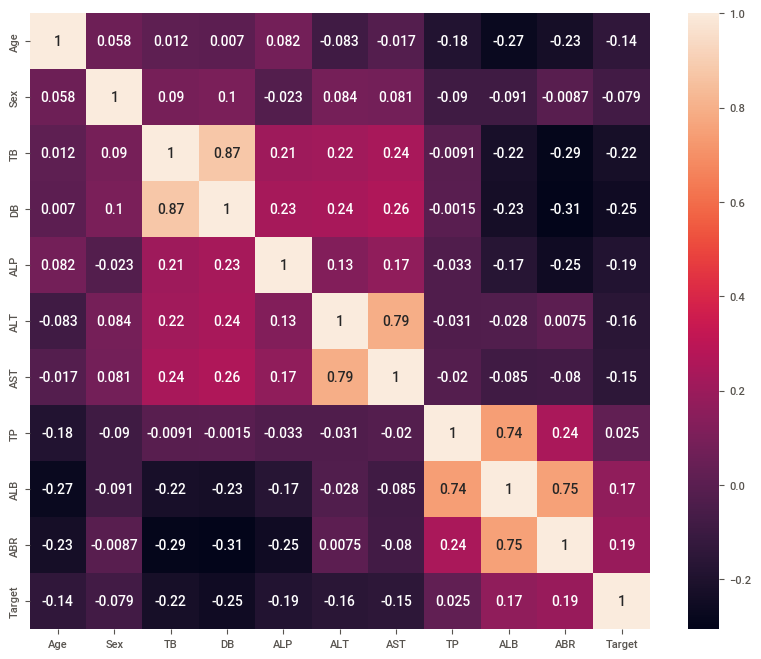

In [ ]:
plt.figure(figsize=(10,8), facecolor='white')

sb.heatmap(data.corr(),annot=True)

* By the above graph and chart we can see that there is a high co relation between **Direct Bilirubin and Total Bilirubin** similarly there is a high co relation between **Alamine Aminotransferase & Aspartate Aminotransferase** alco there is high co relation between **Total Protein and Albumin** along with **Albumin and Albumin and Globulin Ratio**


* But only **Direct Bilirubin and Total Bilirubin** has extremely high co relation and hence we can drop anyone column while working and calculations.

## **Scaling of Data for easy Model Building** (Min Max Scalar)

In [ ]:
# Min max scaler
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
df = ['Sex','Target']
data1 = scaling.fit_transform(data.drop(df, axis = 1))

In [ ]:
data.columns

Index(['Age', 'Sex', 'TB', 'DB', 'ALP', 'ALT', 'AST', 'TP', 'ALB', 'ABR',
       'Target'],
      dtype='object')

In [ ]:
data2=pd.DataFrame(data1,columns=['Age', 'TB', 'DB', 'ALP', 'ALT', 'AST', 'TP', 'ALB', 'ABR'])
data2

,Age,TB,DB,ALP,ALT,AST,TP,ALB,ABR
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.563636,0.521739,0.428571
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.690909,0.500000,0.314286
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.600000,0.521739,0.421429
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.563636,0.543478,0.500000
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.654545,0.326087,0.071429
...,...,...,...,...,...,...,...,...,...
565,0.651163,0.001340,0.000000,0.213483,0.005025,0.004879,0.400000,0.152174,0.050000
566,0.418605,0.002681,0.000000,0.017098,0.012563,0.004269,0.418182,0.500000,0.571429
567,0.558140,0.005362,0.005102,0.088911,0.019095,0.007928,0.490909,0.500000,0.500000
568,0.313953,0.012064,0.020408,0.059111,0.009548,0.004472,0.563636,0.543478,0.500000


In [ ]:
df1 = data[['Sex','Target']]
df1

,Sex,Target
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
578,1,2
579,1,1
580,1,1
581,1,1


In [ ]:
data2 = data2.reset_index(drop = True)
df1 = df1.reset_index(drop = True)

In [ ]:
data = pd.concat([data2, df1], axis = 1)
data

,Age,TB,DB,ALP,ALT,AST,TP,ALB,ABR,Sex,Target
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.563636,0.521739,0.428571,0,1
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.690909,0.500000,0.314286,1,1
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.600000,0.521739,0.421429,1,1
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.563636,0.543478,0.500000,1,1
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.654545,0.326087,0.071429,1,1
...,...,...,...,...,...,...,...,...,...,...,...
565,0.651163,0.001340,0.000000,0.213483,0.005025,0.004879,0.400000,0.152174,0.050000,1,2
566,0.418605,0.002681,0.000000,0.017098,0.012563,0.004269,0.418182,0.500000,0.571429,1,1
567,0.558140,0.005362,0.005102,0.088911,0.019095,0.007928,0.490909,0.500000,0.500000,1,1
568,0.313953,0.012064,0.020408,0.059111,0.009548,0.004472,0.563636,0.543478,0.500000,1,1


In [ ]:
data

,Age,TB,DB,ALP,ALT,AST,TP,ALB,ABR,Sex,Target
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.563636,0.521739,0.428571,0,1
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.690909,0.500000,0.314286,1,1
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.600000,0.521739,0.421429,1,1
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.563636,0.543478,0.500000,1,1
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.654545,0.326087,0.071429,1,1
...,...,...,...,...,...,...,...,...,...,...,...
565,0.651163,0.001340,0.000000,0.213483,0.005025,0.004879,0.400000,0.152174,0.050000,1,2
566,0.418605,0.002681,0.000000,0.017098,0.012563,0.004269,0.418182,0.500000,0.571429,1,1
567,0.558140,0.005362,0.005102,0.088911,0.019095,0.007928,0.490909,0.500000,0.500000,1,1
568,0.313953,0.012064,0.020408,0.059111,0.009548,0.004472,0.563636,0.543478,0.500000,1,1


## **Splitting Data Into X & Y**

In [ ]:
x = data.drop(['Target','DB'], axis = 1)
y = data['Target']

In [ ]:
x

,Age,TB,ALP,ALT,AST,TP,ALB,ABR,Sex
0,0.709302,0.004021,0.060576,0.003015,0.001626,0.563636,0.521739,0.428571,0
1,0.674419,0.140751,0.310699,0.027136,0.018296,0.690909,0.500000,0.314286,1
2,0.674419,0.092493,0.208598,0.025126,0.011791,0.600000,0.521739,0.421429,1
3,0.627907,0.008043,0.058134,0.002010,0.002033,0.563636,0.543478,0.500000,1
4,0.790698,0.046917,0.064485,0.008543,0.009961,0.654545,0.326087,0.071429,1
...,...,...,...,...,...,...,...,...,...
565,0.651163,0.001340,0.213483,0.005025,0.004879,0.400000,0.152174,0.050000,1
566,0.418605,0.002681,0.017098,0.012563,0.004269,0.418182,0.500000,0.571429,1
567,0.558140,0.005362,0.088911,0.019095,0.007928,0.490909,0.500000,0.500000,1
568,0.313953,0.012064,0.059111,0.009548,0.004472,0.563636,0.543478,0.500000,1


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
565    2
566    1
567    1
568    1
569    2
Name: Target, Length: 570, dtype: int64

## **Splitting data into Train Test modules for evaluation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state = 15)

In [ ]:
print('Shape of input train data is:', x_train.shape,'\n','Shape of input test data is:', x_test.shape,'\n')
print('Shape of output train data is:', y_train.shape,'\n','Shape of output test data is:', y_test.shape,'\n')

Shape of input train data is: (399, 9) 
 Shape of input test data is: (171, 9) 

Shape of output train data is: (399,) 
 Shape of output test data is: (171,) 



## **Apply SMOTE to the Model**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_smote,y_smote = sm.fit_resample(x_train,y_train)

## **Convert that SMOTE names to train names for easy calculations**

In [ ]:
x_train = x_smote
y_train = y_smote

## **Model Building - Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)


LogisticRegression()

## **Model Prediction - Logistic regression**

In [ ]:
Pred_LR = model_LR.predict(x_test)
Pred_LR

array([2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2])

## **Model Evaluation - Logistic Regression**

In [ ]:
print(classification_report(y_test, Pred_LR))

print("Accuracy Score for Logistic regression Model is:", accuracy_score(y_test,Pred_LR))

              precision    recall  f1-score   support

           1       0.80      0.64      0.71       110
           2       0.52      0.72      0.61        61

    accuracy                           0.67       171
   macro avg       0.66      0.68      0.66       171
weighted avg       0.70      0.67      0.67       171

Accuracy Score for Logistic regression Model is: 0.6666666666666666


## **Model Building - KNN Classifier**

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

error_rate=[]

for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    error_rate.append(np.mean(y_pred != y_test))
error_rate

[0.36257309941520466,
 0.3567251461988304,
 0.42105263157894735,
 0.38596491228070173,
 0.4327485380116959,
 0.40350877192982454,
 0.39766081871345027,
 0.39766081871345027,
 0.4327485380116959,
 0.42105263157894735]

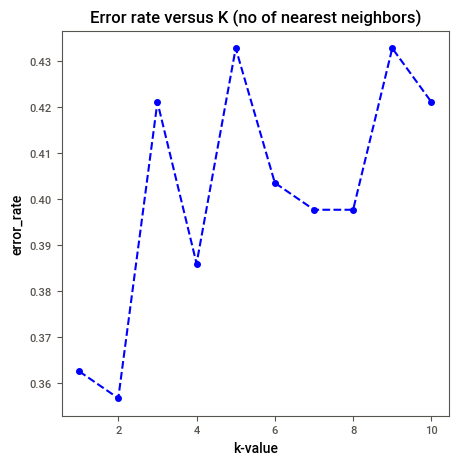

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(range(1,11),error_rate, color = "blue", linestyle = "dashed", marker = 'o', markersize = 4)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

In [ ]:
# As 7 neighbours shows the lowest no of errors hence we use as 7 test

knn_model = KNeighborsClassifier(n_neighbors = 2)
knn_model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=2)

## **Model Prediction - KNN Classifier**

In [ ]:
Pred_KNN = knn_model.predict(x_test)
Pred_KNN

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

## **Model Evaluation - KNN Classifier**

In [ ]:
print(classification_report(y_test, Pred_KNN))

print("Accuracy Score for KNN Classifier Model is:", accuracy_score(y_test,Pred_KNN))

              precision    recall  f1-score   support

           1       0.69      0.82      0.75       110
           2       0.50      0.33      0.40        61

    accuracy                           0.64       171
   macro avg       0.59      0.57      0.57       171
weighted avg       0.62      0.64      0.62       171

Accuracy Score for KNN Classifier Model is: 0.6432748538011696


## **Model Building - SVM**

In [ ]:

from sklearn.svm import SVC
svclassifier = SVC()
svclassifier.fit(x_train, y_train)

SVC()

## **Model Prediction - SVM**

In [ ]:
Pred_SVC = svclassifier.predict(x_test)

## **Model Evaluation - SVM**

In [ ]:
print(classification_report(y_test, Pred_SVC))

print("Accuracy Score for Support Vector Model is:", accuracy_score(y_test,Pred_SVC))

              precision    recall  f1-score   support

           1       0.89      0.45      0.59       110
           2       0.47      0.90      0.62        61

    accuracy                           0.61       171
   macro avg       0.68      0.67      0.61       171
weighted avg       0.74      0.61      0.60       171

Accuracy Score for Support Vector Model is: 0.6081871345029239


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,5,10,50,60,70],'gamma':[1,0.1,0.01,0.001,0.0001],'random_state':list(range(1,20))}
model = SVC()
grid = GridSearchCV(model, param_grid, verbose = 2, scoring="f1", cv = 10)
grid.fit(x,y)

print(grid.best_params_)

Fitting 10 folds for each of 570 candidates, totalling 5700 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1

[CV] END ....................C=0.1, gamma=1, random_state=11; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=11; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=11; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=12; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=12; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=12; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=12; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=12; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=12; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=12; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=12; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, random_state=12; total time=   0.0s
[CV] END ...................

[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.1s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END ..................C=0.1, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C

[CV] END .................C=0.1, gamma=0.01, random_state=15; total time=   0.0s
[CV] END .................C=0.1, gamma=0.01, random_state=15; total time=   0.0s
[CV] END .................C=0.1, gamma=0.01, random_state=15; total time=   0.0s
[CV] END .................C=0.1, gamma=0.01, random_state=15; total time=   0.0s
[CV] END .................C=0.1, gamma=0.01, random_state=15; total time=   0.0s
[CV] END .................C=0.1, gamma=0.01, random_state=16; total time=   0.0s
[CV] END .................C=0.1, gamma=0.01, random_state=16; total time=   0.0s
[CV] END .................C=0.1, gamma=0.01, random_state=16; total time=   0.0s
[CV] END .................C=0.1, gamma=0.01, random_state=16; total time=   0.0s
[CV] END .................C=0.1, gamma=0.01, random_state=16; total time=   0.0s
[CV] END .................C=0.1, gamma=0.01, random_state=16; total time=   0.0s
[CV] END .................C=0.1, gamma=0.01, random_state=16; total time=   0.0s
[CV] END .................C=

[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=

[CV] END ................C=0.1, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=17; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ................C=0

[CV] END ................C=0.1, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.

[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END ...................

[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ...................

[CV] END .....................C=5, gamma=0.1, random_state=4; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=4; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=4; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=4; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=4; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=4; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=4; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=4; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=4; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=4; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=5; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................

[CV] END ....................C=5, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=6; total time=   0.1s
[CV] END ....................C=5, gamma=0.01, random_state=6; total time=   0.4s
[CV] END ....................C=5, gamma=0.01, random_state=6; total time=   0.1s
[CV] END ....................C=5, gamma=0.01, random_state=6; total time=   0.2s
[CV] END ....................C=5, gamma=0.01, random_state=6; total time=   0.1s
[CV] END ....................C=5, gamma=0.01, random_state=6; total time=   0.1s
[CV] END ....................C=5, gamma=0.01, random_state=7; total time=   0.1s
[CV] END ....................C=5, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=7; total time=   0.1s
[CV] END ....................C=5, gamma=0.01, random_state=7; total time=   0.1s
[CV] END ....................C=5, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................

[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................

[CV] END ...................C=5, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................

[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C

[CV] END .................C=5, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END .................C=

[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END .....................C=10, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=15; total time=   0.0s
[CV] END ...................

[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C

[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=

[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=

[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=1

[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END .....................C=50, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=15; total time=   0.0s
[CV] END ...................

[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ...................

[CV] END ...................C=50, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................

[CV] END ...................C=50, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=9; total time=   0.1s
[CV] END ...................C=50, gamma=0.01, random_state=9; total time=   0.1s
[CV] END ...................C=50, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=50, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C

[CV] END .................C=50, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=

[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=

[CV] END ................C=50, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=5

[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END ...................

[CV] END ....................C=60, gamma=0.1, random_state=5; total time=   0.1s
[CV] END ....................C=60, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................

[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................

[CV] END ..................C=60, gamma=0.01, random_state=18; total time=   0.1s
[CV] END ..................C=60, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=18; total time=   0.1s
[CV] END ..................C=60, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=19; total time=   0.1s
[CV] END ..................C=60, gamma=0.01, random_state=19; total time=   0.1s
[CV] END ..................C

[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=

[CV] END .................C=60, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=

[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.1s
[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.1s
[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=6

[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.2s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.1s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.1s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.1s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.1s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END .....................C=70, gamma=1, random_state=13; total time=   0.1s
[CV] END .....................C=70, gamma=1, random_state=14; total time=   0.1s
[CV] END .....................C=70, gamma=1, random_state=14; total time=   0.1s
[CV] END .....................C=70, gamma=1, random_state=14; total time=   0.1s
[CV] END .....................C=70, gamma=1, random_state=14; total time=   0.1s
[CV] END .....................C=70, gamma=1, random_state=14; total time=   0.1s
[CV] END .....................C=70, gamma=1, random_state=14; total time=   0.1s
[CV] END .....................C=70, gamma=1, random_state=14; total time=   0.1s
[CV] END .....................C=70, gamma=1, random_state=14; total time=   0.1s
[CV] END .....................C=70, gamma=1, random_state=14; total time=   0.2s
[CV] END .....................C=70, gamma=1, random_state=14; total time=   0.1s
[CV] END .....................C=70, gamma=1, random_state=15; total time=   0.1s
[CV] END ...................

[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=16; total time=   0.1s
[CV] END ...................C=70, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=16; total time=   0.1s
[CV] END ...................C=70, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................

[CV] END ...................C=70, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................

[CV] END ..................C=70, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=

[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=

[CV] END ................C=70, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=7

In [ ]:
svclassifier = SVC(C = 0.1, gamma = 1, random_state = 1)
svclassifier.fit(x_train, y_train)

SVC(C=0.1, gamma=1, random_state=1)

In [ ]:
Pred_SVC1 = svclassifier.predict(x_test)

In [ ]:
print(classification_report(y_test, Pred_SVC1))

print("Accuracy Score for Support Vector (After Tuning) Model is:", accuracy_score(y_test,Pred_SVC1))

              precision    recall  f1-score   support

           1       0.80      0.44      0.56       110
           2       0.44      0.80      0.57        61

    accuracy                           0.57       171
   macro avg       0.62      0.62      0.57       171
weighted avg       0.67      0.57      0.57       171

Accuracy Score for Support Vector (After Tuning) Model is: 0.5672514619883041


## **Model Creation - K Mean**

In [ ]:
from sklearn.cluster import KMeans

model_k = KMeans(n_clusters = 9, random_state = 10)

model_k.fit(x)

KMeans(n_clusters=9, random_state=10)

## **Model Evaluation - K Mean**

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(x,model_k.labels_)


0.22802554863488583

Text(0, 0.5, 'WCSS')

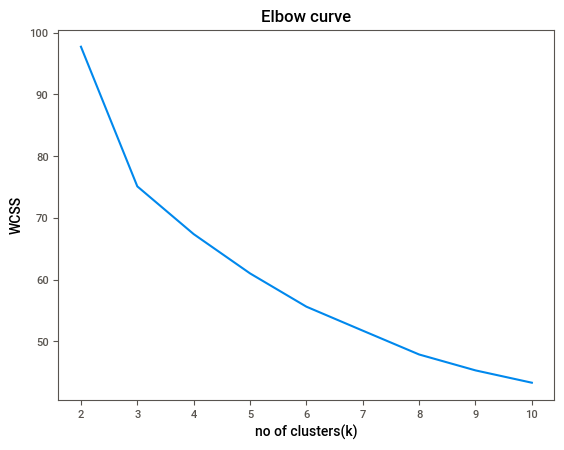

In [ ]:
WCSS = []
for i in range(2,11):
    model = KMeans(n_clusters = i, random_state = 15)
    model.fit(x)
    WCSS.append(model.inertia_)
plt.plot(range(2,11),WCSS)
plt.title('Elbow curve')
plt.xlabel('no of clusters(k)')
plt.ylabel('WCSS')



* From the graph we can see that K value is best for the 3 hence we will use 3 as cluster value

## **Model Evaluation - K Mean** (After confirming K value)

In [ ]:
model_k = KMeans(n_clusters = 3, random_state = 10)

model_k.fit(x)

silhouette_score(x, model_k.labels_)

0.33707210756146433

## **Model Creation - Random Forest** (Without Tuning)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DF = DecisionTreeClassifier()
model_DF.fit(x_train,y_train)

DecisionTreeClassifier()

## **Model Prediction - Random Forest** (Without Tuning)

In [ ]:
Pred_RF = model_DF.predict(x_test)

## **Model Evaluation - Random Forest** (Without tuning)

In [ ]:
print(classification_report(y_test, Pred_RF))

print("Accuracy Score for Random Forest Model is:", accuracy_score(y_test,Pred_RF))

              precision    recall  f1-score   support

           1       0.76      0.74      0.75       110
           2       0.55      0.57      0.56        61

    accuracy                           0.68       171
   macro avg       0.65      0.66      0.65       171
weighted avg       0.68      0.68      0.68       171

Accuracy Score for Random Forest Model is: 0.6783625730994152


## Hyperparameter Tuning (Grid Search CV)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {"criterion":("gini", "entropy"), "splitter":("best", "random"), "max_depth":(list(range(1, 20))),
          "min_samples_split":[2, 3, 4], "min_samples_leaf":list(range(1, 20))}

tree_clf = DecisionTreeClassifier(random_state = 8)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs = -1, verbose = 1, cv = 10)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 10 folds for each of 4332 candidates, totalling 43320 fits
Best paramters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})


In [ ]:
tree_cv.best_score_

0.7720621468926554

In [ ]:
model_RF2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 17, min_samples_leaf = 1,
                                   min_samples_split = 2, splitter='random')

model_RF2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=17, splitter='random')

In [ ]:
Pred_RF2 = model_RF2.predict(x_test)

In [ ]:
print(classification_report(y_test, Pred_RF2))

print("Accuracy Score for Support Vector Model is:", accuracy_score(y_test,Pred_RF2))

              precision    recall  f1-score   support

           1       0.69      0.65      0.67       110
           2       0.43      0.48      0.45        61

    accuracy                           0.58       171
   macro avg       0.56      0.56      0.56       171
weighted avg       0.60      0.58      0.59       171

Accuracy Score for Support Vector Model is: 0.5847953216374269


## Hyperparameter Tuning (Randomised Search CV)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF3 = RandomForestClassifier()
model_RF3.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
Pred_RF3 = model_RF3.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.5789473684210527

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [ ]:
model_RFCL = RandomForestClassifier(random_state=42)

model_RFCL_cv = RandomizedSearchCV(estimator = model_RFCL, scoring = 'accuracy', param_distributions = random_grid,
                           n_iter = 100, cv = 10, verbose = 2, random_state = 42, n_jobs = -1)
model_RFCL_cv.fit(x_train, y_train)
rf_best_params = model_RFCL_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   5.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   5.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  27.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  26.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  26.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  17.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  14.5s
[CV] END bootstrap=False, max_depth=30, m

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   5.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   5.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  27.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  26.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  26.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  17.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  14.4s
[CV] END bootstrap=False, max_depth=30, m

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   5.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   5.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   5.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  27.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  26.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  14.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  16.9s
[CV] END bootstrap=False, max_depth=10, ma

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   5.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   5.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   5.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  26.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  26.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  14.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=  16.8s
[CV] END bootstrap=False, max_depth=10, ma

/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/phiacreation/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

Best paramters: {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': False})


In [ ]:
model_RFCL = RandomForestClassifier(n_estimators = 1400, min_samples_split = 2, min_samples_leaf = 1,
                                    max_features = 'auto', max_depth = 40, bootstrap = False)
model_RFCL.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=40, max_features='auto',
                       n_estimators=1400)

In [ ]:
Pred_RFCL = model_RFCL.predict(x_test)

In [ ]:
print(classification_report(y_test, Pred_RFCL))

print("Accuracy Score for Random Forest After Tuning is:", accuracy_score(y_test,Pred_RFCL))

              precision    recall  f1-score   support

           1       0.71      0.80      0.75       110
           2       0.53      0.41      0.46        61

    accuracy                           0.66       171
   macro avg       0.62      0.60      0.61       171
weighted avg       0.65      0.66      0.65       171

Accuracy Score for Random Forest After Tuning is: 0.6608187134502924


## **Model Building - Bagging**


In [ ]:
from sklearn.ensemble import BaggingClassifier
model_bag = BaggingClassifier(base_estimator = model_LR, n_estimators = 200)
model_bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=200)


## **Model Prediction - Bagging**

In [ ]:
Pred_BAG = model_bag.predict(x_test)

## **Model Evaluation - Bagging**

In [ ]:
print(classification_report(y_test, Pred_BAG))

print("Accuracy Score for Bagging Model is:", accuracy_score(y_test,Pred_BAG))

              precision    recall  f1-score   support

           1       0.80      0.63      0.70       110
           2       0.52      0.72      0.60        61

    accuracy                           0.66       171
   macro avg       0.66      0.67      0.65       171
weighted avg       0.70      0.66      0.67       171

Accuracy Score for Bagging Model is: 0.6608187134502924


## **Model Building - Gradient Boosting**


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_GB = GradientBoostingClassifier(n_estimators = 120)
model_GB.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=120)

## **Model Prediction - Gradient Boosting**


In [ ]:
Pred_GB = model_GB.predict(x_test)

## **Model Evaluation - Gradient Boosting**

In [ ]:
print(classification_report(y_test, Pred_GB))

print("Accuracy Score for Gadient Boosting Model (Without Hyperparameter Tuning) is:", accuracy_score(y_test,Pred_GB))

              precision    recall  f1-score   support

           1       0.73      0.76      0.75       110
           2       0.54      0.49      0.51        61

    accuracy                           0.67       171
   macro avg       0.63      0.63      0.63       171
weighted avg       0.66      0.67      0.66       171

Accuracy Score for Gadient Boosting Model (Without Hyperparameter Tuning) is: 0.6666666666666666


## **XG Boost Installation**

In [ ]:
!pip install xgboost

### Mapping train and test for converting 1 & 2 to 0 & 1

In [ ]:
y_train_mapped = [0 if label == 1 else 1 for label in y_train]
y_test_mapped = [0 if label == 1 else 1 for label in y_test]

## **Model Building - XG Boost**

In [ ]:
from xgboost import XGBClassifier
model_XGBP=XGBClassifier()
model_XGBP.fit(x_train,y_train_mapped)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## **Model Prediction - XG Boost**


In [ ]:
Pred_XGBP = model_XGBP.predict(x_test)

## **Model Evaluation - XG Boost**

In [ ]:
print(classification_report(y_test_mapped, Pred_XGBP))

print("Accuracy Score for Gadient Boosting Model (Without Hyperparameter Tuning) is:", accuracy_score(y_test_mapped,Pred_XGBP))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       110
           1       0.57      0.44      0.50        61

    accuracy                           0.68       171
   macro avg       0.65      0.63      0.63       171
weighted avg       0.67      0.68      0.67       171

Accuracy Score for Gadient Boosting Model (Without Hyperparameter Tuning) is: 0.6842105263157895


### Hyper Parameter Tuning

In [ ]:
gamma = np.linspace(1,300, num = 19).astype(int)
learning_rate = np.linspace(0,1, num = 10)
max_depth = np.linspace(1,20, num = 13).astype(int)
n_estimator = np.linspace(50,300, num = 11).astype(int)
reg_alpha = np.linspace(1,250, num = 13).astype(int)
reg_lambda = np.linspace(1,250, num = 13).astype(int)

param_grid = {'gamma': gamma,'learning_rate': learning_rate, 'max_depth': max_depth,
              'n_estimators': n_estimator,'reg_alpha': reg_alpha,'reg_lambda': reg_lambda}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
modelXGB = XGBClassifier(random_state = 42,verbosity = 0)
rcv = RandomizedSearchCV(estimator = modelXGB, scoring = 'f1',param_distributions = param_grid,
                         n_iter = 100, cv = 10, verbose = 2, random_state = 42, n_jobs = -1)

rcv.fit(x_train, y_train_mapped)
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  18.8s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.2s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  10.4s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  11.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  11.5s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   5.4s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estim

[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.4s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.6s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.6s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.3s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  10.6s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  11.2s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  11.6s
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   8.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   9.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   8.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=  12.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=  11.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=  12.4s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   4.7s
[CV] END bootstrap=False, ma

[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  10.6s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  11.5s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   6.0s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   5.5s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   5.1s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=  16.8s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=  16.4s
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   6.4s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   6.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   4.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   4.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   5.4s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   3.4s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   3.3s
[CV] END bootstrap=False, max_depth=10, m

[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   7.3s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   6.2s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   6.3s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   6.3s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   4.7s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   4.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   5.4s
[CV] END bootstrap=False, max_depth=40, max_f

[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   3.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   8.7s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.5s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.2s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.1s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.4s
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.5s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  10.6s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  20.8s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  21.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  23.5s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  21.9s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time=  20.9s
[CV] END gamma=117, learning_rate=0.0

Best paramters: {'reg_lambda': 1, 'reg_alpha': 63, 'n_estimators': 200, 'max_depth': 1, 'learning_rate': 0.0, 'gamma': 117})


## **Model Building - XG Boost (After Tuning)**


In [ ]:
XGB2 = XGBClassifier(reg_lambda = 1, reg_alpha = 63, n_estimators = 200,
                     max_depth = 1, learning_rate = 0.0, gamma = 117)
XGB2.fit(x_train, y_train_mapped)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=117, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## **Model Prediction - XG Boost (After Tuning)**

In [ ]:
Pred_XGBP2 = XGB2.predict(x_test)

## **Model Evaluation - XG Boost (After Tuning)**

In [ ]:
print(classification_report(y_test_mapped, Pred_XGBP2))

print("Accuracy Score for Gadient Boosting Model (with Hyperparameter Tuning) is:", accuracy_score(y_test_mapped,Pred_XGBP2))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       110
           1       0.00      0.00      0.00        61

    accuracy                           0.64       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.41      0.64      0.50       171

Accuracy Score for Gadient Boosting Model (with Hyperparameter Tuning) is: 0.6432748538011696


## **Model Building - ANN**

In [ ]:
from sklearn.neural_network import MLPClassifier
model_ANN = MLPClassifier( hidden_layer_sizes = (50,3), learning_rate_init = 0.1,
                      max_iter = 100, random_state = 2)
model_ANN.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(50, 3), learning_rate_init=0.1, max_iter=100,
              random_state=2)

## **Model Prediction - ANN**


In [ ]:
Pred_proba = model_ANN.predict_proba(x_test)
Pred_ANN = model_ANN.predict(x_test)

## **Model Evaluation - ANN**

In [ ]:
print(classification_report(y_test, Pred_ANN))

print("Accuracy Score for Gadient Boosting Model (with Hyperparameter Tuning) is:", accuracy_score(y_test,Pred_ANN))

              precision    recall  f1-score   support

           1       0.95      0.49      0.65       110
           2       0.51      0.95      0.66        61

    accuracy                           0.65       171
   macro avg       0.73      0.72      0.65       171
weighted avg       0.79      0.65      0.65       171

Accuracy Score for Gadient Boosting Model (with Hyperparameter Tuning) is: 0.6549707602339181


## **Conclusion**

* Total we have applied 13 models in this evalution. some of them are with hyper parameter tuning and some of them are not with hyper parameter tuning. We have get scores using Classification report and Accuracy score. The scores of the all the models are as mentioned below which explain the best accurate model for the evaluation of the Liver Prediction Scenario use case.

In [ ]:
print("1) Accuracy Score for Logistic regression Model is:", accuracy_score(y_test,Pred_LR))
print("2) Accuracy Score for KNN Classifier Model is:", accuracy_score(y_test,Pred_KNN))
print("3) Accuracy Score for Support Vector Model is:", accuracy_score(y_test,Pred_SVC))
print("4) Accuracy Score for Support Vector Model (After Tuning) is:", accuracy_score(y_test,Pred_SVC1))
print("5) Accuracy Score for Decision Tree Model is:", accuracy_score(y_test,Pred_RF))
print("6) Accuracy Score for Decision Tree Model (After Tuning) is:", accuracy_score(y_test,Pred_RF2))
print("7) Accuracy Score for Random Forest Model is:",accuracy_score(y_test,Pred_RF3))
print("8) Accuracy Score for Random Forest After Tuning is:", accuracy_score(y_test,Pred_RFCL))
print("9) Accuracy Score for Bagging Model is:", accuracy_score(y_test,Pred_BAG))
print("10) Accuracy Score for Gadient Boosting Model (Without Hyperparameter Tuning) is:", accuracy_score(y_test,Pred_GB))
print("11) Accuracy Score for XG Boost Model is:", accuracy_score(y_test_mapped,Pred_XGBP))
print("12) Accuracy Score for XGBoost Model (with Hyperparameter Tuning) is:", accuracy_score(y_test_mapped,Pred_XGBP2))
print("13) Accuracy Score for ANN Model is:", accuracy_score(y_test,Pred_ANN))



1) Accuracy Score for Logistic regression Model is: 0.6666666666666666
2) Accuracy Score for KNN Classifier Model is: 0.6432748538011696
3) Accuracy Score for Support Vector Model is: 0.6081871345029239
4) Accuracy Score for Support Vector Model (After Tuning) is: 0.5672514619883041
5) Accuracy Score for Decision Tree Model is: 0.6783625730994152
6) Accuracy Score for Decision Tree Model (After Tuning) is: 0.5847953216374269
7) Accuracy Score for Random Forest Model is: 0.6549707602339181
8) Accuracy Score for Random Forest After Tuning is: 0.6608187134502924
9) Accuracy Score for Bagging Model is: 0.6608187134502924
10) Accuracy Score for Gadient Boosting Model (Without Hyperparameter Tuning) is: 0.6666666666666666
11) Accuracy Score for XG Boost Model is: 0.6842105263157895
12) Accuracy Score for XGBoost Model (with Hyperparameter Tuning) is: 0.6432748538011696
13) Accuracy Score for ANN Model is: 0.6549707602339181


# **In the above code we can clearly see that the maximum score we get 68% accuracy with the XG Boost Model without hyper parameter Tuning.**
# **We get this score by by one column which has high corelation with another input column,  along with it we have applied SMOTE function in this iteration of the code.**